Kassel GeoJSON data saved to Kassel_geojson_data.geojson


C:\Users\hamud\AppData\Roaming\Python\Python312\site-packages\jupyter_client\session.py:200: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)  # noqa
C:\Users\hamud\AppData\Roaming\Python\Python312\site-packages\jupyter_client\session.py:200: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)  # noqa


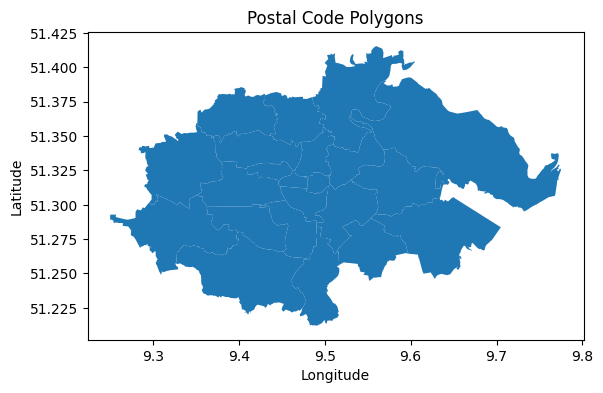

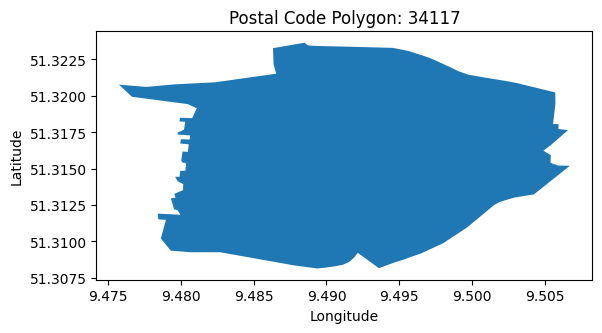

The corresponding postal code for the target polygon is: 34117


C:\Users\hamud\AppData\Roaming\Python\Python312\site-packages\jupyter_client\session.py:200: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)  # noqa


In [4]:
import osmnx as ox
import geojson
import pandas as pd
import os
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, shape
import json

def get_place_postal_code_polygons(place_name):
    postal_code_polygons = ox.features_from_place(place_name, tags={"boundary": "postal_code"})
    df = pd.DataFrame(postal_code_polygons).dropna(subset=['postal_code', 'geometry'])
    return {feature['postal_code']: feature['geometry'] for _, feature in df.iterrows()}

def format_geojson_data(data):
    return geojson.FeatureCollection([
        geojson.Feature(geometry=polygon, properties={"postal_code": postal_code})
        for postal_code, polygon in data.items()
    ])

def save_geojson_to_file(geojson_data, file_path):
    with open(file_path, 'w') as file:
        geojson.dump(geojson_data, file, indent=2)

def plot_geojson_data(geojson_file_path):
    gdf = gpd.read_file(geojson_file_path)
    gdf.plot()
    plt.title("Postal Code Polygons")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.show()

def get_postal_code_for_point(latitude, longitude, postal_code_polygons):
    point = Point(longitude, latitude)
    return next((postal_code for postal_code, polygon in postal_code_polygons.items() if polygon.contains(point)), None)

def load_geojson(file_path):
    with open(file_path, 'r') as file:
        geojson_data = json.load(file)

    return {
        feature['properties']['postal_code']: shape(feature['geometry'])
        for feature in geojson_data['features']
    }

def plot_polygon(postal_code_polygons, postal_code):
    polygon = postal_code_polygons.get(postal_code)
    if polygon:
        gdf = gpd.GeoDataFrame(geometry=[polygon])
        gdf.plot()
        plt.title(f"Postal Code Polygon: {postal_code}")
        plt.xlabel("Longitude")
        plt.ylabel("Latitude")
        plt.show()
    else:
        print(f"No polygon found for postal code: {postal_code}")

def get_corresponding_postal_code_for_polygon(geojson_file_path, target_polygon):
    postal_code_polygons = load_geojson(geojson_file_path)
    return next((postal_code for postal_code, polygon in postal_code_polygons.items() if target_polygon.equals(polygon)), None)

# User input for the city or country name
place_input = input("Geben Sie den Stadtnamen oder Ländernamen ein: ")

# Example call for user input
place_postal_code_polygons = get_place_postal_code_polygons(place_input)
place_geojson_data = format_geojson_data(place_postal_code_polygons)

# Automatically create the filename in the same folder
file_name = f"{place_input}_geojson_data.geojson"

# Example call to save GeoJSON data to a file
save_geojson_to_file(place_geojson_data, file_name)

print(f"{place_input} GeoJSON data saved to {file_name}")

# Beispielaufruf der Plot-Funktion
plot_geojson_data(file_name)

# Test get_corresponding_postal_code_for_polygon function
target_postal_code = '34117'

# Get the polygon for postal code 34117
target_polygon = load_geojson(file_name).get(target_postal_code)

# Plot the polygon for postal code 34117 (optional)
plot_polygon({target_postal_code: target_polygon}, target_postal_code)

# Find the corresponding postal code for the target polygon
corresponding_postal_code = get_corresponding_postal_code_for_polygon(file_name, target_polygon)
print(f"The corresponding postal code for the target polygon is: {corresponding_postal_code}")


Kassel GeoJSON data saved to Kassel_geojson_data.geojson


C:\Users\hamud\AppData\Roaming\Python\Python312\site-packages\jupyter_client\session.py:200: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)  # noqa
C:\Users\hamud\AppData\Roaming\Python\Python312\site-packages\jupyter_client\session.py:200: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)  # noqa


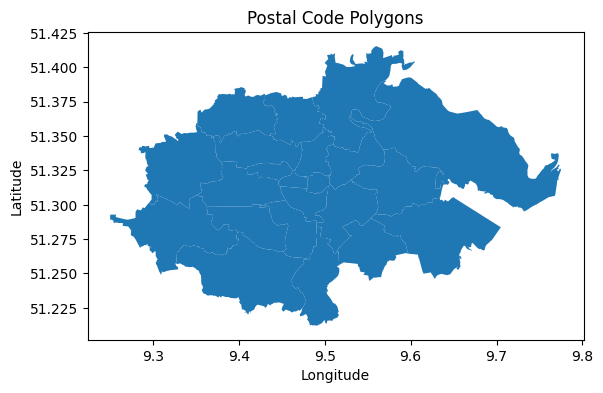

In [24]:
import osmnx as ox
import geojson
import pandas as pd
import os
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import shape

def get_place_postal_code_polygons(place_name):
    query_tags = {"boundary": "postal_code"}
    postal_code_polygons = ox.features_from_place(place_name, tags=query_tags)
    df = pd.DataFrame(postal_code_polygons).dropna(subset=['postal_code', 'geometry', 'postal_code_level'])
    return {feature['postal_code']: feature['geometry'] for _, feature in df.iterrows()}

def format_geojson_data(data):
    return geojson.FeatureCollection([
        geojson.Feature(geometry=polygon, properties={"postal_code": postal_code})
        for postal_code, polygon in data.items()
    ])

# User input for the city or country name
place_input = input("Enter the city or country name: ")

# Example call for user input
place_postal_code_polygons = get_place_postal_code_polygons(place_input)
place_geojson_data = format_geojson_data(place_postal_code_polygons)

# Automatically create the filename in the same folder
file_name = f"{place_input}_geojson_data.geojson"

# Example call to save GeoJSON data to a file
save_geojson_to_file(place_geojson_data, file_name)

print(f"{place_input} GeoJSON data saved to {file_name}")

# Beispielaufruf der Plot-Funktion
plot_geojson_data(file_name)
